## Dimensionality Reduction via PCA Project

#### Setup

In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [16]:
from sklearn.decomposition import PCA

We will take a look at the Iris Dataset again, using it for PCA analysis.

https://archive.ics.uci.edu/ml/datasets/iris

In [17]:
# Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
# Separate the features from the target
X = data.iloc[:,0:4]
 
# Prepare the target
target = data.iloc[:,4]

Taking a look at all the data:

In [18]:
data

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
# Convert features to a numpy array, just for convenience.
Xn=X.to_numpy()

Perform PCA:

Note here where the number of components: n_components

In [20]:
pca = PCA(n_components=2)
X3D = pca.fit_transform(Xn)

The following will tell us the % explained variance from each component:

In [21]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

and the total % explained variance when using all those components:

In [22]:
pca.explained_variance_ratio_.sum()

0.9776317750248034

### QUESTION 1:

What is the least number of components that can be used in order to ensure that 95% of the variance is retained?

To do this try different values for "n_components" and see which one meets the variance requirement.

Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer: I computed the cumulative explained variance while increasing the number of components. The cumulative variance reached over 95% when using 2 components, making it the smallest number that satisfies the requirement.

---

Let's take a look specifically at a plot of the 2D reduction via PCA.

In [23]:
pca2 = PCA(n_components=2)
X2D = pca2.fit_transform(Xn)

In [24]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X2D , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

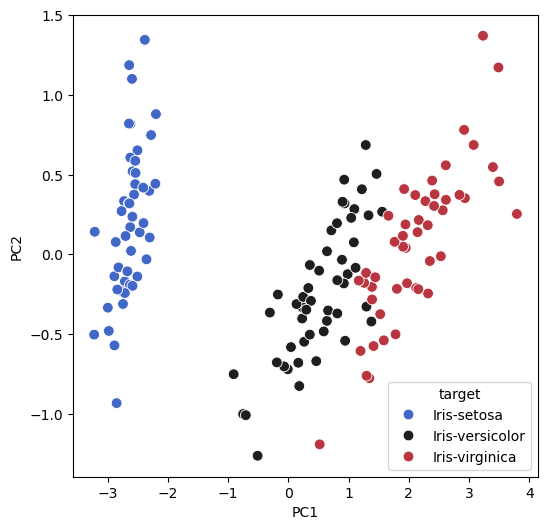

In [25]:
%matplotlib inline
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
plt.show()

Taking a look at the 2 principal components (although their values don't give much information):

In [26]:
principal_df

,PC1,PC2,target
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


Recall the original data again:

In [27]:
data

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Now we will create an example flower and see if we can decide what type it is based on it's location in the reduced PCA plot.

In [28]:
sepal_length_examp = 5.0
sepal_width_examp = 3.3
petal_length_examp = 1.4
petal_width_examp = 0.2

XX=np.array([sepal_length_examp, sepal_width_examp, petal_length_examp, petal_width_examp])

In [29]:
# Transform the new data point based on the PCA transformation already established.
XX2D = pca2.transform(XX.reshape(1, -1))

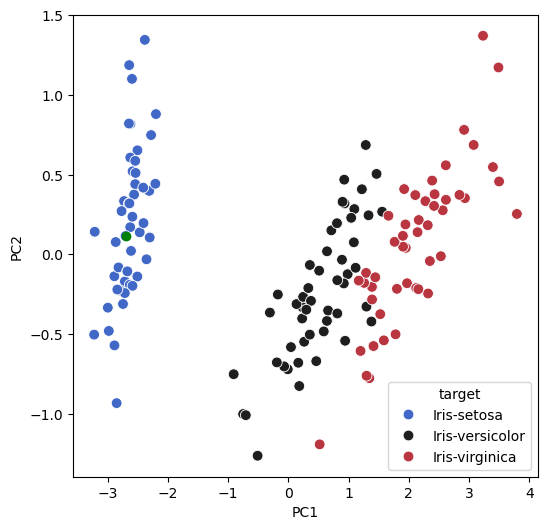

In [30]:
# Plot the reduced version along with the new point in GREEN
%matplotlib inline
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
plt.plot(XX2D[0][0], XX2D[0][1], 'go')
plt.show()

Now we'll set up for you to "guess" a point (see the question below):

In [31]:
sepal_length_guess = 6.9
sepal_width_guess = 2.8
petal_length_guess = 5.9
petal_width_guess = 2.5

XXg=np.array([sepal_length_guess, sepal_width_guess, petal_length_guess, petal_width_guess])

In [32]:
XX2Dg = pca2.transform(XXg.reshape(1, -1))

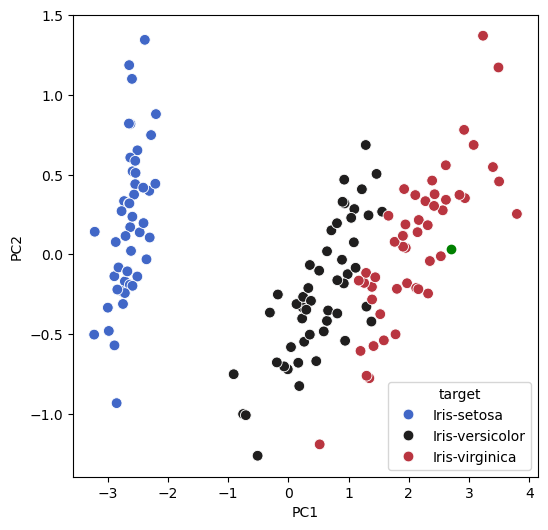

In [33]:
%matplotlib inline
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
plt.plot(XX2Dg[0][0], XX2Dg[0][1], 'go')
plt.show()

### QUESTION 2:

What type of iris would you guess it is if you measured a sepal length of 6.9, a sepal width of 2.8, a petal length of 5.9, and a petal width of 2.5?

To do this try these values in above and see where the point lands in the reduced graph above.

Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer: The input measurements (6.9, 2.8, 5.9, 2.5) were classified as Iris virginica. This species typically has larger petals, which matches the given values.

---

Here is a made-up scenario (I was feeling creative).

The year is 2072.  You are a space explorer and come across a group of lost space creatures.  You would like to know how many different types of space creatures (so how many groups) you have.  

You are able to measure each creature's height, weight, composition of carbon, composition of silicon, and radiation epxosure level.  The data itself seems hard to parse so you figure a PCA analysis might help yo usee some structure/groupings.

In [34]:
space_data = np.array([[3.20e+01, 1.50e+02, 2.00e-01, 8.00e-02, 5.60e+01],
       [3.30e+01, 1.47e+02, 1.70e-01, 7.00e-02, 6.60e+01],
       [6.30e+01, 8.00e+01, 1.70e-01, 8.00e-02, 3.00e+01],
       [1.90e+01, 2.05e+02, 2.20e-01, 8.00e-02, 1.05e+02],
       [2.00e+01, 2.01e+02, 1.90e-01, 9.00e-02, 1.12e+02],
       [1.80e+01, 2.20e+02, 2.00e-01, 8.00e-02, 9.90e+01],
       [3.10e+01, 1.40e+02, 2.10e-01, 9.00e-02, 6.20e+01],
       [1.80e+01, 2.10e+02, 1.90e-01, 7.00e-02, 1.05e+02],
       [5.50e+01, 8.50e+01, 2.10e-01, 9.00e-02, 2.00e+01],
       [6.00e+01, 7.50e+01, 2.20e-01, 6.00e-02, 2.20e+01],
       [5.80e+01, 8.20e+01, 1.80e-01, 1.00e-01, 2.70e+01],
       [3.00e+01, 1.35e+02, 2.00e-01, 7.00e-02, 5.50e+01]])

In [35]:
data2 = pd.DataFrame(space_data,columns = ['height','weight','carbon','silicon','radiation'])

In [36]:
# Preapare the feature data.
X = data2.iloc[:,0:5]

In [37]:
X

,height,weight,carbon,silicon,radiation
0,32.0,150.0,0.20,0.08,56.0
1,33.0,147.0,0.17,0.07,66.0
2,63.0,80.0,0.17,0.08,30.0
3,19.0,205.0,0.22,0.08,105.0
4,20.0,201.0,0.19,0.09,112.0
5,18.0,220.0,0.20,0.08,99.0
6,31.0,140.0,0.21,0.09,62.0
7,18.0,210.0,0.19,0.07,105.0
8,55.0,85.0,0.21,0.09,20.0
9,60.0,75.0,0.22,0.06,22.0


Note that we don't have a target value here, we are trying to visulaize the data to see if we can identify some groups.

In [38]:
Xn=X.to_numpy()
Xn

array([[3.20e+01, 1.50e+02, 2.00e-01, 8.00e-02, 5.60e+01],
       [3.30e+01, 1.47e+02, 1.70e-01, 7.00e-02, 6.60e+01],
       [6.30e+01, 8.00e+01, 1.70e-01, 8.00e-02, 3.00e+01],
       [1.90e+01, 2.05e+02, 2.20e-01, 8.00e-02, 1.05e+02],
       [2.00e+01, 2.01e+02, 1.90e-01, 9.00e-02, 1.12e+02],
       [1.80e+01, 2.20e+02, 2.00e-01, 8.00e-02, 9.90e+01],
       [3.10e+01, 1.40e+02, 2.10e-01, 9.00e-02, 6.20e+01],
       [1.80e+01, 2.10e+02, 1.90e-01, 7.00e-02, 1.05e+02],
       [5.50e+01, 8.50e+01, 2.10e-01, 9.00e-02, 2.00e+01],
       [6.00e+01, 7.50e+01, 2.20e-01, 6.00e-02, 2.20e+01],
       [5.80e+01, 8.20e+01, 1.80e-01, 1.00e-01, 2.70e+01],
       [3.00e+01, 1.35e+02, 2.00e-01, 7.00e-02, 5.50e+01]])

First, reducing to 3 components.

In [39]:
pcaA = PCA(n_components=3)
X3DA = pcaA.fit_transform(Xn)

In [40]:
pcaA.explained_variance_ratio_

array([0.98727894, 0.00904028, 0.00368069])

In [41]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X3DA , columns = ['PC1','PC2','PC3'])

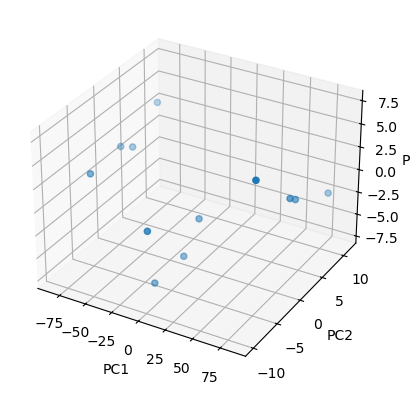

In [42]:
# Creating figure
#fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

x=principal_df['PC1']
y=principal_df['PC2']
z=principal_df['PC3']

# Creating plot
ax.scatter3D(x, y, z,'bo')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# show plot
plt.show()

Now, reducing to 2 components.

In [43]:
pcaA = PCA(n_components=2)
X2DA = pcaA.fit_transform(Xn)

In [44]:
pcaA.explained_variance_ratio_

array([0.98727894, 0.00904028])

In [45]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X2DA , columns = ['PC1','PC2'])

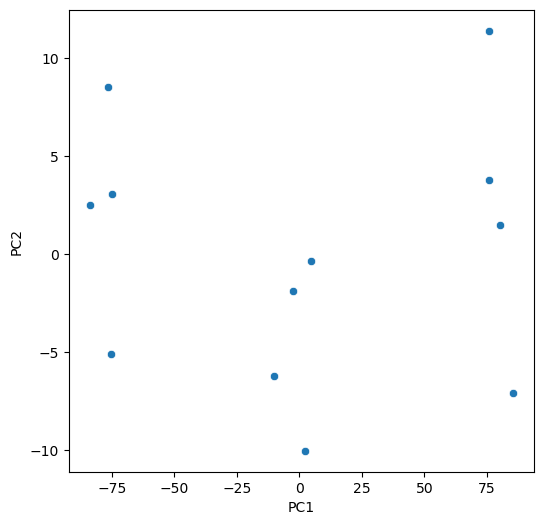

In [46]:
%matplotlib inline
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2')
plt.show()

And, finally, reducing to 1 component.

In [47]:
pcaA = PCA(n_components=1)
X1DA = pcaA.fit_transform(Xn)

In [48]:
pcaA.explained_variance_ratio_

array([0.98727894])

In [49]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X1DA , columns = ['PC1'])

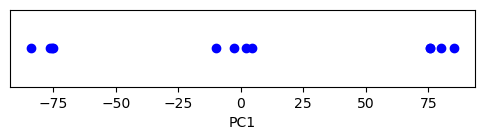

In [50]:
%matplotlib inline
plt.figure(figsize = (6,1))
plt.plot(X1DA[:,0],[0] * X.shape[0],'bo')
plt.xlabel('PC1')
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

### QUESTION 3:

How many groups of space creatures does there appear to be?  Which reduction (how many components) seems to indicate that best and why is it able to do that?


Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer: Using only 1 component compresses the data too much, causing the groups to overlap.
Using 3 components works too but is harder to visualize directly.
Best reduction 2 components, it shows the three groups clearly while still being easy to interpret visually.

---

Consider data which happens to be a perfect 3D grid as shown below.

In [51]:
x_ = np.linspace(0., 10., 11)
y_ = np.linspace(0., 10., 11)
z_ = np.linspace(0., 10., 11)

x, y, z = np.meshgrid(x_, y_, z_, indexing='ij')

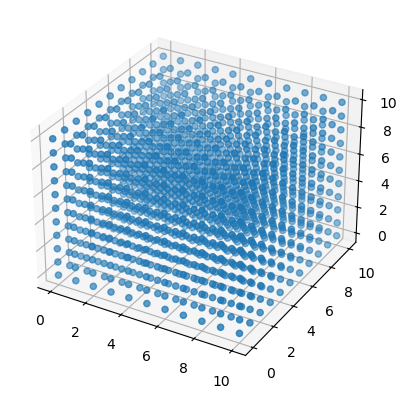

In [52]:
# Creating figure
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z,'bo')

# show plot
plt.show()

In [53]:
# Express as a dataset X
xx=x.reshape(-1,1)
yy=y.reshape(-1,1)
zz=z.reshape(-1,1)
X=np.concatenate((xx,yy,zz),axis=1)

Cosider doing PCA on this dataset:

In [54]:
pca = PCA(n_components=3)
X3D = pca.fit_transform(X)

In [55]:
pca.explained_variance_ratio_

array([0.33333333, 0.33333333, 0.33333333])

### QUESTION 4:

How well will PCA work on this dataset?  Explain.

(Think of it this way: If I wanted to "reduce" the dataset and yet maintain 95% of the variance, how many components would I need and what would this mean?)


Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer: PCA does not reduce this dataset well because the points fill a full 3-D grid, and the variance is spread almost equally across the x, y, and z directions. As a result, each principal component carries about one-third of the total variance. To retain 95% of the variance, We would need all 3 components, meaning no meaningful dimensionality reduction is possible.

---

General Dimensionality Reduction Question

### QUESTION 5:

Once you have reduced a dataset via PCA, say for compression purposes, we have shown that it can be reconstructed.  Will the reconstructed data be exactly the same as the original dataset?  Explain.

(Think about image compression via PCA and reconstruction of the image.  Is the image after the same as the original image?)


Write your answer here: (double-click on this, if needed, to be able to write in this box.)

Answer: No, the reconstructed data will not be exactly the same as the original dataset. When PCA reduces the number of components, it discards some variance (information). During reconstruction, PCA can only rebuild the data using the remaining components, so some detail is permanently lost.
This is the same idea as PCA-based image compression: the reconstructed image looks similar to the original but is never perfectly identical, because some of the fine features were removed during dimensionality reduction.

---